Shortcut          | Significado   
------------------|----------------
**CTRL + Enter**  | ejecutar celta 
**SHIFT + Enter** | ejecutar celda y pasar a siguiente
**ALT + Enter**   | ejecutar celda y crear una debajo

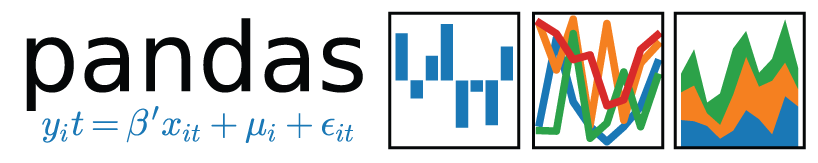

---

# Pandas I - carga y manipulación básica de datos

_Se han visto varias formas para almacenamiento de datos; las propias de Python (integer, real, complex, boolen, list, tuple, dictionary) y los arrays de `NumPy`._

_En este notebook se presenta la librería `pandas`._

**Objetivos**:

* Características de sus estructuras de datos
* Carga de datos
* Manipulación
---

## ¿Qué es pandas?

[`pandas`](https://pandas.pydata.org/) es una libreria que proporciona estructuras de datos y herramientas para el análisis de grandes volúmenes de datos de manera rápida. Se articula sobre `NumPy`, y permite enfrentar situaciones en las que hay que **manejar datos reales** con un proceso de **carga, limpieza, filtrado y reducción, y posterior análisis**.

Es de gran utilidad en la industria del Big Data, pues un grandísmo porcentaje del tiempo de trabajo en Data Science está asociado a la limpieza y preparación de los datos (ver este [artículo](http://omaymas.github.io/Data_Science_Life/) y esta [entrada en Quora](https://www.quora.com/What-percentage-of-time-does-a-data-analyst-spend-on-different-tasks-collecting-data-cleaning-data-analyzing-data-etc)), y `pandas` está pensado para esta tarea.

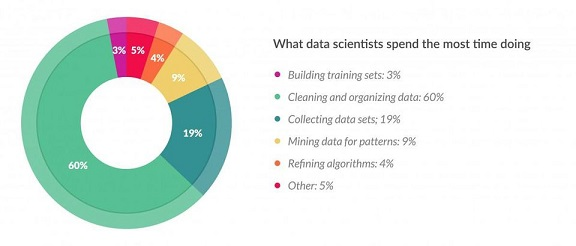

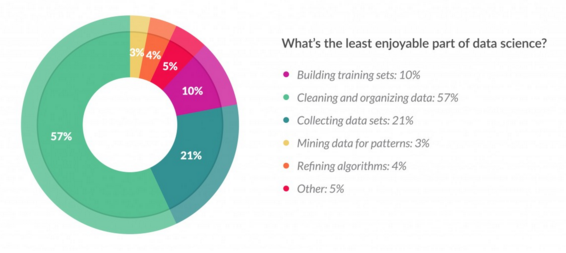


> I take numbers from one place and move them to another place so others can look at them better. Then I make the computer do the same regularly. - by /u/sebee on [Data scientists/analysts of Reddit, can you ELI5 your job?](https://www.reddit.com/r/datascience/comments/843xs8/data_scientistsanalysts_of_reddit_can_you_eli5)  

De manera estándar y por convenio, `pandas` se importa de la siguiente forma:

In [2]:
import pandas as pd

## Cargando los datos

La fuenta será un fichero de datos metereológicos de la Consejeria Agricultura, Pesca y Desarrollo Rural de Andalucía.

In [1]:
from IPython.display import HTML
HTML('<iframe src="http://www.juntadeandalucia.es/agriculturaypesca/ifapa/ria/servlet/FrontController?action=Static&url=coordenadas.jsp&c_provincia=4&c_estacion=4" width="700" height="400"></iframe>')

/home/aneqr/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Para ver que tiene el fichero:

In [8]:
# en Linux
# !head ../data/tabernas_meteo_data.txt

In [3]:
# en Windows
!more ..\data\tabernas_meteo_data.txt

FECHA    DIA Al04TMax Al04TMin Al04TMed Al04Precip 
-------- --- -------- -------- -------- ---------- 

13-12-16 348     14.6      4.0      8.9        0.2 
12-12-16 347     15.9      3.0      8.7        0.2 
11-12-16 346     16.9      5.0     10.2        0.2 
10-12-16 345     16.4      6.3     10.9        0.2 
09-12-16 344     13.6      9.5     11.2        1.8 
08-12-16 343     14.5      5.4     10.4        0.0 
07-12-16 342     15.7      6.1     10.1        0.2 
06-12-16 341     17.7      7.1     13.4        0.0 
05-12-16 340     16.6      7.9     11.7        0.0 
04-12-16 339     11.8     10.1     10.9       23.8 
03-12-16 338     13.4      8.7     11.1        1.0 
02-12-16 337     17.2      5.5     10.8        0.0 
01-12-16 336     13.6      9.2     11.1        3.2 
30-11-16 335     14.0     10.7     12.1        0.0 
29-11-16 334     13.8      4.3      9.4        0.2 
28-11-16 333     13.9      5.5      9.0        0.0 
27-11-16 332     14.2      8.1     10.4        2.8 
26-11-16 33

07-04-12  98     18.9      1.1     10.6        0.0 
06-04-12  97     17.6      4.5     11.4        0.0 
05-04-12  96     18.2      5.7     12.5        0.0 
04-04-12  95     19.8      6.1     12.5        0.4 
03-04-12  94     19.7      6.0     12.8        0.0 
02-04-12  93     21.8      6.4     13.8        0.0 
01-04-12  92     22.4      4.9     12.9        0.0 
31-03-12  91     21.3      6.8     13.0        0.2 
30-03-12  90     19.9      3.9     11.7        0.0 
29-03-12  89     18.8      7.3     13.0        0.0 
28-03-12  88     18.4      9.1     13.1        0.0 
27-03-12  87     18.8      3.3     11.8        0.0 
26-03-12  86     17.8      8.5     12.9        0.0 
25-03-12  85     16.6      7.2     11.2        0.0 
24-03-12  84     16.2      8.9     11.4        0.0 
23-03-12  83     18.5      3.1     11.1        0.0 
22-03-12  82     16.8      2.6      9.7        0.0 
21-03-12  81     15.0      4.1      8.6        0.0 
20-03-12  80     12.9      5.1      7.9        0.0 
19-03-12  79

12-07-09 193     34.7     13.9     25.8        0.0 
11-07-09 192     31.0     10.8     23.3        0.0 
10-07-09 191     31.4     13.1     23.4        0.0 
09-07-09 190     30.5     16.3     23.9        0.0 
08-07-09 189     30.6     16.7     24.5        0.0 
07-07-09 188     33.1     18.1     26.0        0.0 
06-07-09 187     35.6     19.4     28.0        0.0 
05-07-09 186     35.7     17.1     27.9        0.0 
04-07-09 185     37.5     18.6     29.2        0.0 
03-07-09 184     35.9     18.8     28.3        0.0 
02-07-09 183     38.0     18.3     28.2        0.0 
01-07-09 182     35.8     17.5     27.3        0.0 
30-06-09 181     34.6     16.9     26.7        0.0 
29-06-09 180     35.5     15.7     26.2        0.0 
28-06-09 179     34.2     13.6     24.7        0.0 
27-06-09 178     32.1     15.0     24.5        0.0 
26-06-09 177     31.6     16.9     24.2        0.0 
25-06-09 176     34.2     16.9     26.8        0.0 
24-06-09 175     33.3     11.4     23.3        0.0 
23-06-09 174

17-10-06 290     23.2     10.9     17.1        0.0 
16-10-06 289     21.9     12.7     17.5        0.0 
15-10-06 288     21.5     12.0     16.5        0.0 
14-10-06 287     23.2      9.5     16.4        0.0 
13-10-06 286     23.3     11.2     16.6        0.0 
12-10-06 285     23.3     12.8     17.6        0.0 
11-10-06 284     27.5     12.8     19.0        0.0 
10-10-06 283     24.2     12.4     18.3        0.0 
09-10-06 282     23.4     11.8     17.8        0.0 
08-10-06 281     26.8     12.3     19.1        0.0 
07-10-06 280     27.8     10.8     19.0        0.0 
06-10-06 279     24.7      9.7     16.6        0.0 
05-10-06 278     24.7     11.3     17.5        0.0 
04-10-06 277     24.2     15.1     19.4        0.0 
03-10-06 276     32.2     15.0     23.7        0.0 
02-10-06 275     32.1     16.0     22.8        0.0 
01-10-06 274     31.7     14.2     22.1        0.0 
30-09-06 273     28.8     13.8     20.9        0.0 
29-09-06 272     27.0     15.2     20.9        0.0 
28-09-06 271

21-01-04  21     17.7      0.2      8.3        0.0 
20-01-04  20     12.6     -1.2      5.0        0.0 
19-01-04  19     11.0     -2.8      4.5        0.0 
18-01-04  18     11.3      3.1      8.3        0.6 
17-01-04  17     17.8      2.1      9.6        0.0 
16-01-04  16     17.2      3.5      9.4        0.2 
15-01-04  15     15.2      5.1      9.0        0.0 
14-01-04  14     19.9      3.6     11.0        0.0 
13-01-04  13     21.7      5.1     10.9        0.0 
12-01-04  12     21.0      4.7     11.3        0.0 
11-01-04  11     22.4      6.8     12.5        0.0 
10-01-04  10     20.4      5.8     12.2        0.0 
09-01-04   9     20.3      7.2     14.0        0.0 
08-01-04   8     19.9      6.1     13.0        0.0 
07-01-04   7     16.0      1.4      8.3        0.0 
06-01-04 
05-01-04   5     16.4      0.6      7.1        0.0 
04-01-04   4     16.2     -0.4      7.2        0.0 
03-01-04   3     15.1      0.8      7.9        0.0 
02-01-04   2     17.4      5.7     10.6        0.0 
01

Los datos no están en formato CSV, aunque sí que tienen algo de estructura. Se cargan con `pandas` mediante la función [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html):

In [8]:
pd.read_csv("../data/tabernas_meteo_data.txt").head(5)

,FECHA DIA Al04TMax Al04TMin Al04TMed Al04Precip
0,-------- --- -------- -------- -------- ------...
1,13-12-16 348 14.6 4.0 8.9 ...
2,12-12-16 347 15.9 3.0 8.7 ...
3,11-12-16 346 16.9 5.0 10.2 ...
4,10-12-16 345 16.4 6.3 10.9 ...


Se deben hacer los siguientes cambios:
* Separar los campos con espacios en blanco
* Descartar columna del día del año (no interesa)
* Saltar las dos primeras lineas (no interesan)
* Cambiar nombre a las columnas a otros más legibles
* Convertir las fechas al formato correcto

In [3]:
data = pd.read_csv("../data/tabernas_meteo_data.txt",
                    delim_whitespace=True,  # Separa los campos con espacios en blanco
                    usecols=(0, 2, 3, 4, 5),  # Selecciona las columnas interesantes
                    skiprows=2,  # Salta las dos primeras filas
                    names=['DATE', 'TMAX', 'TMIN', 'TMED', 'PRECIP'],  # Nombra las columnas
                    parse_dates=['DATE'],  # Cambia el formato de la fecha (lo parsea)
                    dayfirst=True,  # Cambia el orden de la fecha
                    index_col=['DATE'])  # Señala que el indexado se haga con la fecha (borra el actual)
data.head(5)

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-13,14.6,4.0,8.9,0.2
2016-12-12,15.9,3.0,8.7,0.2
2016-12-11,16.9,5.0,10.2,0.2
2016-12-10,16.4,6.3,10.9,0.2
2016-12-09,13.6,9.5,11.2,1.8


<div class="alert alert-info">Para parsear fechas: http://strftime.org/</div>

## Explorando los datos

In [10]:
data.dtypes  # Tipos de datos de cada columna


TMAX      float64
TMIN      float64
TMED      float64
PRECIP    float64
dtype: object

In [11]:
data.index  # Muestra comienzo y final de la columna que indexa

DatetimeIndex(['2016-12-13', '2016-12-12', '2016-12-11', '2016-12-10',
               '2016-12-09', '2016-12-08', '2016-12-07', '2016-12-06',
               '2016-12-05', '2016-12-04',
               ...
               '2004-01-10', '2004-01-09', '2004-01-08', '2004-01-07',
               '2004-01-06', '2004-01-05', '2004-01-04', '2004-01-03',
               '2004-01-02', '2004-01-01'],
              dtype='datetime64[ns]', name='DATE', length=4732, freq=None)

In [12]:
data.head(4) # Primeras 4 filas

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-13,14.6,4.0,8.9,0.2
2016-12-12,15.9,3.0,8.7,0.2
2016-12-11,16.9,5.0,10.2,0.2
2016-12-10,16.4,6.3,10.9,0.2


In [13]:
data.tail(3)  # Ultimas 3 filas

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-01-03,15.1,0.8,7.9,0.0
2004-01-02,17.4,5.7,10.6,0.0
2004-01-01,18.0,2.5,11.1,0.0


In [14]:
data[1:4:2]  # Slice para obtener sólo determinadas filas

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-12,15.9,3.0,8.7,0.2
2016-12-10,16.4,6.3,10.9,0.2


In [4]:
data.sort_index(inplace=True, ascending=True)  # Indexar de antiguo a moderno
data.head(3)

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-01-01,18.0,2.5,11.1,0.0
2004-01-02,17.4,5.7,10.6,0.0
2004-01-03,15.1,0.8,7.9,0.0


In [16]:
data.sort_index(inplace=True, ascending=False)  # Indexar de moderno a antiguo
data.head(3)

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-13,14.6,4.0,8.9,0.2
2016-12-12,15.9,3.0,8.7,0.2
2016-12-11,16.9,5.0,10.2,0.2


In [17]:
data.sort_values('TMED', inplace=True, ascending=False)  # De mayor temperatura media a menor
data.head()  # Sin argumento el valor default es 5

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-08-24,41.2,23.8,32.1,0.0
2005-07-17,41.9,21.3,31.7,0.0
2012-08-12,41.6,21.0,31.7,0.0
2004-07-24,39.0,23.4,31.4,0.0
2009-07-24,42.6,20.1,31.4,0.0


In [18]:
data.info()  # Información general del dataset. Para columna, las filas con elementos

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4732 entries, 2004-08-24 to 2004-01-06
Data columns (total 4 columns):
TMAX      4712 non-null float64
TMIN      4712 non-null float64
TMED      4712 non-null float64
PRECIP    4711 non-null float64
dtypes: float64(4)
memory usage: 184.8 KB


In [19]:
data.shape  # Numero de filas y columnas

(4732, 4)

In [20]:
data.isnull().sum()  # Cuantos elementos sin valor

TMAX      20
TMIN      20
TMED      20
PRECIP    21
dtype: int64

In [21]:
data.count(axis=0)  # Cuantos elementos con valor

TMAX      4712
TMIN      4712
TMED      4712
PRECIP    4711
dtype: int64

### Descripción estadística

Se pueden pedir los datos estadísticos asociados al dataframe.

In [22]:
data.describe()  # Descripción estadística

,TMAX,TMIN,TMED,PRECIP
count,4712.000000,4712.000000,4712.000000,4711.000000
mean,23.226188,9.678841,16.278332,0.643940
std,7.318777,6.262509,6.637797,3.240754
min,0.000000,-8.200000,-14.900000,0.000000
25%,17.300000,4.500000,10.600000,0.000000
50%,22.900000,9.700000,16.000000,0.000000
75%,29.200000,15.100000,22.100000,0.000000
max,42.600000,23.800000,32.100000,66.200000


Por defecto, los elementos con NA no se tienen en cuenta a la hora de calcular los valores. Se puede comprobar viendo como cambian los datos cuando se substituyen con ceros:

In [23]:
# recuerda que esto no cambia data en realidad, porque no lo hemos guardado
data.fillna(0).describe()

,TMAX,TMIN,TMED,PRECIP
count,4732.000000,4732.000000,4732.000000,4732.000000
mean,23.128022,9.637933,16.209531,0.641082
std,7.457140,6.280731,6.707426,3.233837
min,0.000000,-8.200000,-14.900000,0.000000
25%,17.200000,4.400000,10.500000,0.000000
50%,22.850000,9.700000,16.000000,0.000000
75%,29.100000,15.100000,22.100000,0.000000
max,42.600000,23.800000,32.100000,66.200000


Otra forma de acceder a los datos estadísticos, es pedirlos de forma directa.

In [24]:
data.mean()

TMAX      23.226188
TMIN       9.678841
TMED      16.278332
PRECIP     0.643940
dtype: float64

In [25]:
data.quantile(0.25)

TMAX      17.3
TMIN       4.5
TMED      10.6
PRECIP     0.0
Name: 0.25, dtype: float64

## Accediendo a los datos

### columnas

Hay varias formas de acceder a las columnas: por nombre o por atributo (si no contienen espacios ni caracteres especiales).

In [26]:
data['TMAX'].head()  # Por nombre (label) obteniendo una serie, los 5 primeros

DATE
2004-08-24    41.2
2005-07-17    41.9
2012-08-12    41.6
2004-07-24    39.0
2009-07-24    42.6
Name: TMAX, dtype: float64

In [27]:
data['TMAX'].head()[0]  # Una serie es accesible

41.2

In [28]:
data[['TMAX']].head() # Por el nombre (label) obteniendo un dataframe, los 5 primeros

,TMAX
DATE,
2004-08-24,41.2
2005-07-17,41.9
2012-08-12,41.6
2004-07-24,39.0
2009-07-24,42.6


In [29]:
data[['TMAX', 'TMED']].head()  # Varias columnas por el nombre (label), los 5 primeros

,TMAX,TMED
DATE,,
2004-08-24,41.2,32.1
2005-07-17,41.9,31.7
2012-08-12,41.6,31.7
2004-07-24,39.0,31.4
2009-07-24,42.6,31.4


In [5]:
data.TMED.head()  # Accediendo a una columna por el atributo, obteniendo una serie

DATE
2004-01-01    11.1
2004-01-02    10.6
2004-01-03     7.9
2004-01-04     7.2
2004-01-05     7.1
Name: TMED, dtype: float64

### filas

Hay dos funciones principales para acceder a los datos:
* [`.loc`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) acceso por etiquetas
* [`.iloc`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) acceso por índices

In [31]:
data.loc[pd.to_datetime("2016-09-02")]  # Por etiqueta, obteniendo una serie

TMAX      31.8
TMIN      16.3
TMED      23.2
PRECIP     0.0
Name: 2016-09-02 00:00:00, dtype: float64

In [32]:
data.loc[[pd.to_datetime("2016-09-02")]]  # Por etiqueta, obteniendo un dataframe

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-09-02,31.8,16.3,23.2,0.0


In [33]:
data.loc[[pd.to_datetime("2016-12-01"), pd.to_datetime("2016-12-03")]]  # Varias filas por etiqueta, obteniedo un df

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-01,13.6,9.2,11.1,3.2
2016-12-03,13.4,8.7,11.1,1.0


In [34]:
data.iloc[1]  # Por índice, obteniendo una serie

TMAX      41.9
TMIN      21.3
TMED      31.7
PRECIP     0.0
Name: 2005-07-17 00:00:00, dtype: float64

In [35]:
data.iloc[[1]]  # Por índice, obteniendo un dataframe

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2005-07-17,41.9,21.3,31.7,0.0


In [36]:
data.iloc[1:10:3]  # Slice de varias filas por indice, obteniendo un dataframe

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2005-07-17,41.9,21.3,31.7,0.0
2009-07-24,42.6,20.1,31.4,0.0
2015-07-08,41.1,20.2,30.8,0.0


### filas y columnas 

In [37]:
data.loc[[pd.to_datetime("2016-12-01"), pd.to_datetime("2016-12-03")], ["TMAX", "TMIN"]]

,TMAX,TMIN
DATE,,
2016-12-01,13.6,9.2
2016-12-03,13.4,8.7


In [38]:
data.iloc[[1,10,3], [2, 3]]

,TMED,PRECIP
DATE,,
2005-07-17,31.7,0.0
2016-07-31,30.4,0.0
2004-07-24,31.4,0.0


## Filtrado de datos

In [39]:
data[data.index.duplicated()]  # Búsqueda de duplicados en las fechas

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2015-12-29,18.7,3.4,9.7,0.0


In [40]:
data[data['TMAX']> 40]  # Días calurosos...

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-08-24,41.2,23.8,32.1,0.0
2005-07-17,41.9,21.3,31.7,0.0
2012-08-12,41.6,21.0,31.7,0.0
2009-07-24,42.6,20.1,31.4,0.0
2009-07-22,41.3,20.3,31.0,0.0
2012-06-28,40.5,20.0,30.9,0.0
2015-07-08,41.1,20.2,30.8,0.0
2009-07-23,40.6,20.0,30.6,0.0
2010-08-27,42.4,17.5,29.8,0.0


In [41]:
data[(-10 < data['TMIN']) & (data['TMIN']< -5)]  # Rango deseado de TMin

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2012-02-05,11.5,-5.3,5.9,0.0
2012-02-14,13.1,-5.3,5.3,0.0
2014-12-31,14.3,-5.9,2.9,0.0
2010-12-17,10.5,-5.3,2.8,0.2
2005-01-31,11.4,-5.8,2.8,0.0
2015-02-07,10.6,-5.2,2.2,2.0
2012-02-04,6.5,-6.6,1.9,0.0
2014-12-30,11.5,-6.7,1.5,0.0
2012-02-09,9.9,-6.0,1.4,0.0


In [42]:
data.loc[data.PRECIP.isnull()]  # Búsqueda de valores nulos, asociados a fallos de sensor o recording

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-11-22,13.6,7.8,10.1,NaN
2015-12-31,NaN,NaN,NaN,NaN
2012-08-11,NaN,NaN,NaN,NaN
2012-08-10,NaN,NaN,NaN,NaN
2012-08-09,NaN,NaN,NaN,NaN
2012-08-08,NaN,NaN,NaN,NaN
2012-08-07,NaN,NaN,NaN,NaN
2012-08-06,NaN,NaN,NaN,NaN
2012-08-05,NaN,NaN,NaN,NaN


## Representaciones de datos

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

### Líneas

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,1,'Temperaturas')

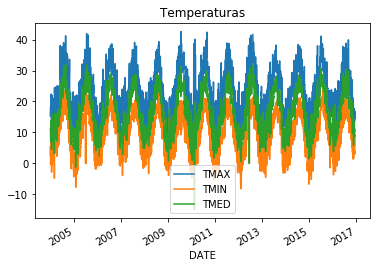

In [44]:
# Pintar la temperatura máx, min, med
data.plot(y=["TMAX", "TMIN", "TMED"])
plt.title('Temperaturas')

### barras

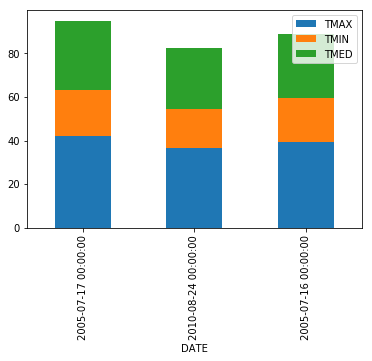

In [45]:
data.iloc[[1,100,20], [0,1, 2]].plot(kind='bar', stacked=True)  # Para 3 fechas...

### cajas

Para pintar [Box Plots](https://en.wikipedia.org/wiki/Box_plot):

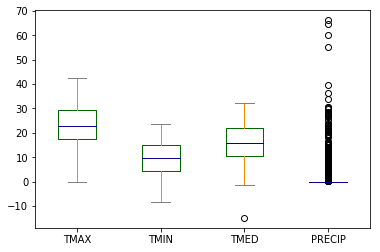

In [49]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(color=color)  # 

### Visualizaciones especiales

#### scatter

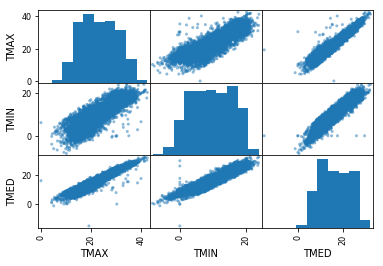

In [50]:
# scatter_matrix
from pandas.plotting import scatter_matrix
axes = scatter_matrix(data.loc[:, "TMAX":"TMED"])

---
**Resumen**
* Como leer un CSV con distintos formatos utilizando la librería pandas.
* Como extraer información de la librería los datos cargados.
* Como acceder a los datos cargados.
* Como representar datos con pandas.

**Referencias**
* [Data cleaning with pandas and numpy](https://realpython.com/python-data-cleaning-numpy-pandas/)

---
[@AeroPython](https://github.com/aeropython): Juan Luis Cano, Mabel Delgado, Alejandro Sáez, Andrés Quezada